## Observations and Insights 

## Analysis

1. The total number of measurements taken for Capomulin and Ramicane had higher values comparing other drug regimen
2. The equal number of male and female mouses have been included in the study
3. Among the group of drug regimen considered, the outlier was only present in Infubinol
4. There is a strong correlation between Average tumor volume and weight

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_data=pd.merge(study_results,mouse_metadata,how='left',on='Mouse ID')

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
total_mice=len(combined_data['Mouse ID'].unique())
print("The total number of mice is: " + str(total_mice))

The total number of mice is: 249


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data['rows_duplicated']=combined_data.duplicated(subset=['Mouse ID','Timepoint'],keep=False)
duplicate_data=combined_data.loc[combined_data['rows_duplicated']==True]
#displaying the duplicated rows and printing the mouse ID
display(duplicate_data)
print("The mouse with duplicate ID and Timepoint is: " + str(duplicate_data['Mouse ID'][107]))


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),rows_duplicated
107,g989,0,45.000000,0,Propriva,Female,21,26,True
137,g989,0,45.000000,0,Propriva,Female,21,26,True
329,g989,5,48.786801,0,Propriva,Female,21,26,True
360,g989,5,47.570392,0,Propriva,Female,21,26,True
620,g989,10,51.745156,0,Propriva,Female,21,26,True
681,g989,10,49.880528,0,Propriva,Female,21,26,True
815,g989,15,51.325852,1,Propriva,Female,21,26,True
869,g989,15,53.442020,0,Propriva,Female,21,26,True
950,g989,20,55.326122,1,Propriva,Female,21,26,True
1111,g989,20,54.657650,1,Propriva,Female,21,26,True


The mouse with duplicate ID and Timepoint is: g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data=combined_data.loc[combined_data['Mouse ID']=='g989']
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),rows_duplicated
107,g989,0,45.000000,0,Propriva,Female,21,26,True
137,g989,0,45.000000,0,Propriva,Female,21,26,True
329,g989,5,48.786801,0,Propriva,Female,21,26,True
360,g989,5,47.570392,0,Propriva,Female,21,26,True
620,g989,10,51.745156,0,Propriva,Female,21,26,True
681,g989,10,49.880528,0,Propriva,Female,21,26,True
815,g989,15,51.325852,1,Propriva,Female,21,26,True
869,g989,15,53.442020,0,Propriva,Female,21,26,True
950,g989,20,55.326122,1,Propriva,Female,21,26,True
1111,g989,20,54.657650,1,Propriva,Female,21,26,True


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#deleting the mouse with duplicate data
cleaned_dataframe=combined_data.loc[combined_data['Mouse ID']!='g989']
cleaned_dataframe=cleaned_dataframe.drop(columns='rows_duplicated')
cleaned_dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
# Checking the number of mice in the clean DataFrame.
total_mice_cleaned=len(cleaned_dataframe['Mouse ID'].unique())
print("The total number of mice in cleaned dataFrame is: " + str(total_mice_cleaned))

The total number of mice in cleaned dataFrame is: 248


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#summary statistics calculated

mean_tumor_volume=cleaned_dataframe.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median_tumor_volume=cleaned_dataframe.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance_tumor_volume=cleaned_dataframe.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std_tumor_volume=cleaned_dataframe.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem_tumor_volume=cleaned_dataframe.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

#creating DataFrame

summary_statistics_df=pd.DataFrame({'Mean Tumor Volume(mm3)' : mean_tumor_volume,
                                   'Median Tumor Volume(mm3)' : median_tumor_volume,
                                   'Variance Tumor Volume(mm3)': variance_tumor_volume,
                                   'Standard Deviation Tumor Volume(mm3)':std_tumor_volume,
                                   'SEM Tumor Volume(mm3)':sem_tumor_volume })

#displaying summary dataframe

display(summary_statistics_df)

,Mean Tumor Volume(mm3),Median Tumor Volume(mm3),Variance Tumor Volume(mm3),Standard Deviation Tumor Volume(mm3),SEM Tumor Volume(mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

cleaned_dataframe.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

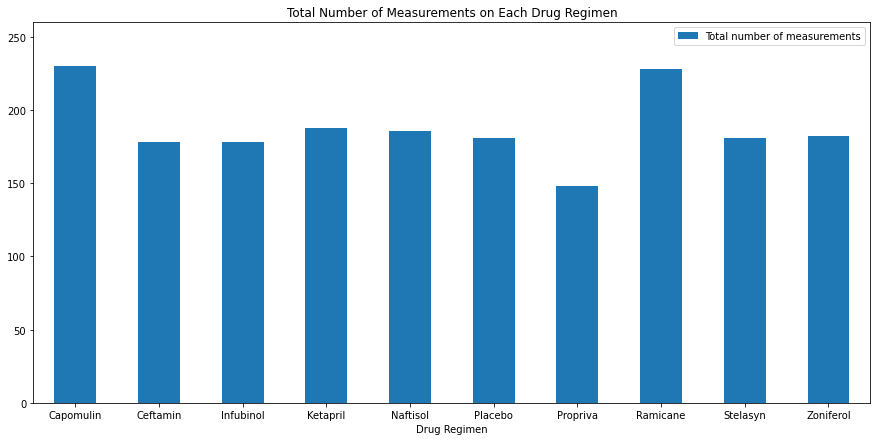

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_of_measurements=cleaned_dataframe.groupby(['Drug Regimen']).count()['Timepoint']
drug_count_df=pd.DataFrame({'Total number of measurements' : count_of_measurements})

#plotting the dataframe using Pandas
drug_count_df.plot(kind="bar", figsize=(15,7),rot=0,title="Total Number of Measurements on Each Drug Regimen",ylim=[0,max(drug_count_df['Total number of measurements'])+30])

#showing plot
plt.show()
plt.tight_layout()


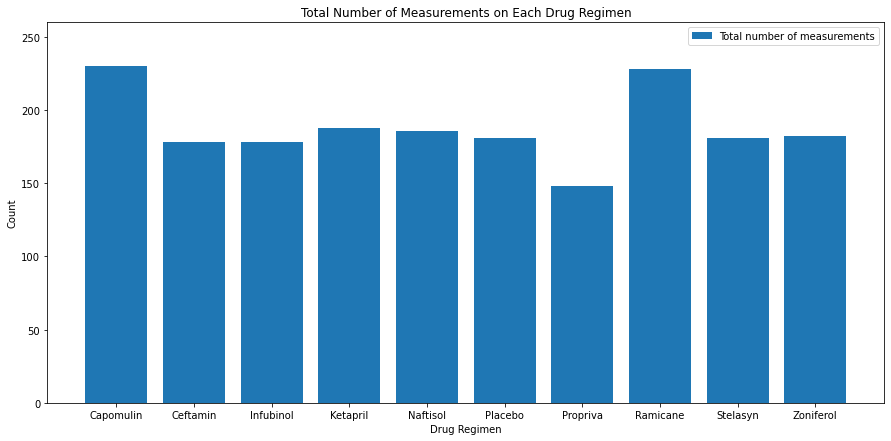

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#fixing the figure size
plt.figure(figsize=(15,7))

#list of x axis values
xaxis=drug_count_df.index

#plotting using pyplot
plt.bar(xaxis, drug_count_df['Total number of measurements'], align="center")

#title,labels,setting limits and adding legnds
plt.title('Total Number of Measurements on Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.ylim(0,max(drug_count_df['Total number of measurements'])+30)
plt.legend(['Total number of measurements'], loc="best")
plt.show()

,Sex
Male,125
Female,123


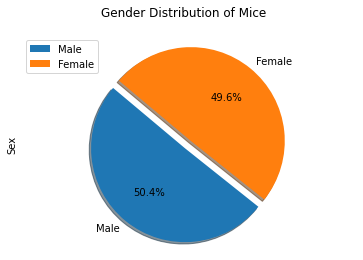

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#finding gender count and printing

#since the same mouse is added with different time points we are filtering and removing duplicates to get the 
#exact male and female mouse included in the study
gender_df = cleaned_dataframe.drop_duplicates(subset=['Mouse ID'], keep='first')
gender_count=pd.DataFrame(gender_df['Sex'].value_counts())
display(gender_count)

#plotting using pandas
explode=(0.1,0)

#plot with title and other specifics for a pie chart
gender_count.plot(kind='pie',title="Gender Distribution of Mice",
                  subplots=True,explode=explode,autopct="%1.1f%%",shadow=True, startangle=140)
plt.axis("equal")

#legend
plt.legend(loc="best")

#to show the chart
plt.show()



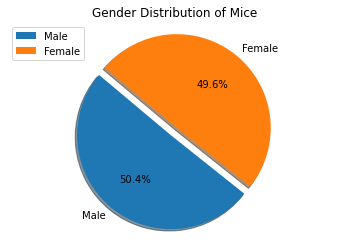

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#plotting using pie plot
plt.pie(gender_count['Sex'], explode=explode, labels=gender_count.index,
        autopct="%1.1f%%", shadow=True, startangle=140)

#axis,legend and title
plt.axis("equal")
plt.legend(loc="best")
plt.title("Gender Distribution of Mice")

#to show the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
1
# Start by getting the last (greatest) timepoint for each mouse
max_time_point_df=pd.DataFrame(cleaned_dataframe.groupby(['Mouse ID']).max()['Timepoint'])
display(max_time_point_df)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_df=max_time_point_df.merge(cleaned_dataframe,how='left',on=['Mouse ID','Timepoint'])
display(merged_df)


,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

for x in range(0,len(treatments)):
    final_vol_data=merged_df.loc[(merged_df['Drug Regimen']==treatments[x]),"Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_data.append(final_vol_data)
    # Calculate the IQR and quantitatively determine if there are any potential outliers.      
    quartiles = final_vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers=final_vol_data.loc[(final_vol_data<lower_bound) | (final_vol_data>upper_bound)]
    print(f"The outliers in {treatments[x]} is {outliers}")
    

The outliers in Capomulin is Series([], Name: Tumor Volume (mm3), dtype: float64)
The outliers in Ramicane is Series([], Name: Tumor Volume (mm3), dtype: float64)
The outliers in Infubinol is 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The outliers in Ceftamin is Series([], Name: Tumor Volume (mm3), dtype: float64)


In [19]:
#oulier mouse
merged_df.iloc[31]

Mouse ID                   c326
Timepoint                     5
Tumor Volume (mm3)      36.3213
Metastatic Sites              0
Drug Regimen          Infubinol
Sex                      Female
Age_months                   18
Weight (g)                   25
Name: 31, dtype: object

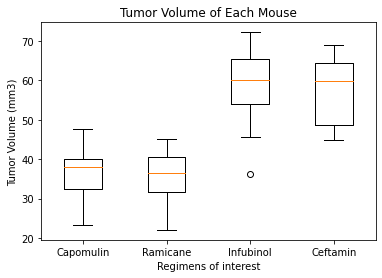

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Each Mouse')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Regimens of interest')
ax1.boxplot(tumor_vol_data,labels=treatments)
plt.show()

## Line and Scatter Plots

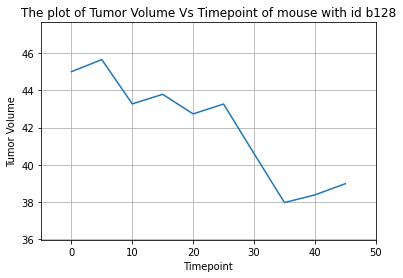

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#creating a dataframe with datapoints for Capomulin
line_df=cleaned_dataframe.loc[cleaned_dataframe['Drug Regimen']=='Capomulin']

#picking the first mouse ID
mouse_id=line_df["Mouse ID"][0]

#updated the dataframe with a single mice data
line_df=line_df.loc[line_df['Mouse ID']==mouse_id]

#doing a line plot
plt.plot(line_df['Timepoint'],line_df['Tumor Volume (mm3)'])

#Adding title, labels, limits and grid
plt.title(f"The plot of Tumor Volume Vs Timepoint of mouse with id {mouse_id}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.xlim(0-5,max(line_df['Timepoint'])+5)
plt.ylim(min(line_df['Tumor Volume (mm3)'])-2,max(line_df['Tumor Volume (mm3)'])+2)
plt.grid()
plt.show()

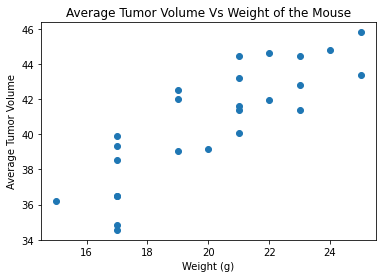

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#creating a dataframe only with drug Capomulin regimen
scatter_df=cleaned_dataframe.loc[cleaned_dataframe['Drug Regimen']=='Capomulin']

#finding the average tumor for each unique mice ID and renaming
avg_tumor=pd.DataFrame(scatter_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"].rename("Average Tumor Volume"))

#merging the data from merged dataframe to get the weight of the mouse
avg_tumor_weight=avg_tumor.merge(merged_df,how='left',on='Mouse ID')

#deleting the columns that are not required
avg_tumor_weight=avg_tumor_weight[['Mouse ID','Average Tumor Volume','Weight (g)']]

#plotting a scatter plot
plt.scatter(avg_tumor_weight['Weight (g)'],avg_tumor_weight['Average Tumor Volume'])

#adding title and label
plt.title("Average Tumor Volume Vs Weight of the Mouse")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

Correlation between Weight and Average Tumor Volume is : 0.84


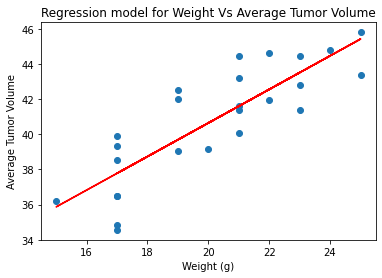

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calculating correlation and printing
correlation = round(st.pearsonr(avg_tumor_weight['Weight (g)'],avg_tumor_weight['Average Tumor Volume'])[0],2)
print("Correlation between Weight and Average Tumor Volume is : " + str(correlation))

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_weight['Weight (g)'],avg_tumor_weight['Average Tumor Volume'])
#applying y=mx+b
regress_values = avg_tumor_weight['Weight (g)']* slope + intercept

#plotting a scatter plot
plt.scatter(avg_tumor_weight['Weight (g)'],avg_tumor_weight['Average Tumor Volume'])

#plotting the regression line
plt.plot(avg_tumor_weight['Weight (g)'],regress_values,"r-")

#adding title and labels
plt.title("Regression model for Weight Vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()